Importing the libraries

In [ ]:
#!pip install shap

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
import xgboost as xgb
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, roc_curve, roc_auc_score
import shap
from imblearn.over_sampling import SMOTE
import warnings
warnings.filterwarnings('ignore')
from google.colab import files

In [ ]:
# Upload files from local machine to Colab
uploaded = files.upload()

Saving Dataset_diabetes.xlsx to Dataset_diabetes (1).xlsx


In [ ]:
# Read the uploaded files into pandas DataFrames
data = pd.read_excel('/content/Dataset_diabetes.xlsx')
data

,Number of times Pregnant,Plasma Concentration,Diastolic BP,Triceps Skin fold thickness,insulin,BMI,Age,"Class (1: positive for diabetes, 0: negative for diabetes)"
0,6.0,148.0,72.0,35.0,0.0,33.6,50.0,1
1,1.0,85.0,66.0,29.0,0.0,26.6,31.0,0
2,8.0,183.0,64.0,0.0,0.0,23.3,32.0,1
3,1.0,89.0,66.0,23.0,94.0,28.1,21.0,0
4,0.0,137.0,40.0,35.0,168.0,43.1,33.0,1
...,...,...,...,...,...,...,...,...
763,10.0,101.0,76.0,48.0,180.0,32.9,63.0,0
764,2.0,122.0,70.0,27.0,0.0,36.8,27.0,0
765,5.0,121.0,72.0,23.0,112.0,26.2,30.0,0
766,1.0,126.0,60.0,0.0,0.0,30.1,47.0,1


In [ ]:
#features
for colum in data.columns:
  print(colum)

Number of times Pregnant
Plasma Concentration
Diastolic BP
Triceps Skin fold thickness
insulin
BMI
Age
Class (1: positive for diabetes, 0: negative for diabetes)


**Description about the dataset**


1. Number of times Pregnant: This field represents the number of times the individual has been pregnant.

2. Plasma Concentration: This field typically refers to the concentration of glucose (sugar) in the individual's blood plasma, measured in some unit (e.g., milligrams per deciliter).

3. Diastolic BP (Blood Pressure): Diastolic blood pressure is the lower number in a blood pressure reading. It represents the pressure in the arteries when the heart is at rest between beats, and it is measured in millimeters of mercury (mmHg).

4. Triceps Skin fold thickness: This field indicates the thickness of the skin fold at the triceps (back of the upper arm), measured in millimeters. It is often used as an indicator of body fat.

5. Insulin: This field represents the level of insulin hormone in the blood, typically measured in some unit (e.g., microunits per milliliter).

6. BMI (Body Mass Index): BMI is a measure of body weight relative to height. It is calculated by dividing a person's weight in kilograms by the square of their height in meters (kg/m²). It provides an indication of whether an individual is underweight, normal weight, overweight, or obese.

7. Age: This field denotes the age of the individual in years.

8. Class (1: positive for diabetes, 0: negative for diabetes): This field is a binary classification label indicating whether the individual is positive (1) or negative (0) for diabetes based on certain criteria or diagnostic tests.

In [ ]:
#check shape of the dataset
data.shape

(768, 8)

In [ ]:
#description of the data set
training_data.describe()

NameError: ignored

from the above describe data we can see the deviation of the data from the mean value and ouliers in the data set

In [ ]:
data.dtypes

Number of times Pregnant                                      float64
Plasma Concentration                                          float64
Diastolic BP                                                  float64
Triceps Skin fold thickness                                   float64
insulin                                                       float64
BMI                                                           float64
Age                                                           float64
Class (1: positive for diabetes, 0: negative for diabetes)      int64
dtype: object

In [ ]:
# Check for missing values in all the columnns of the dataset
data.isnull().sum()

Number of times Pregnant                                      2
Plasma Concentration                                          1
Diastolic BP                                                  4
Triceps Skin fold thickness                                   1
insulin                                                       4
BMI                                                           3
Age                                                           2
Class (1: positive for diabetes, 0: negative for diabetes)    0
dtype: int64

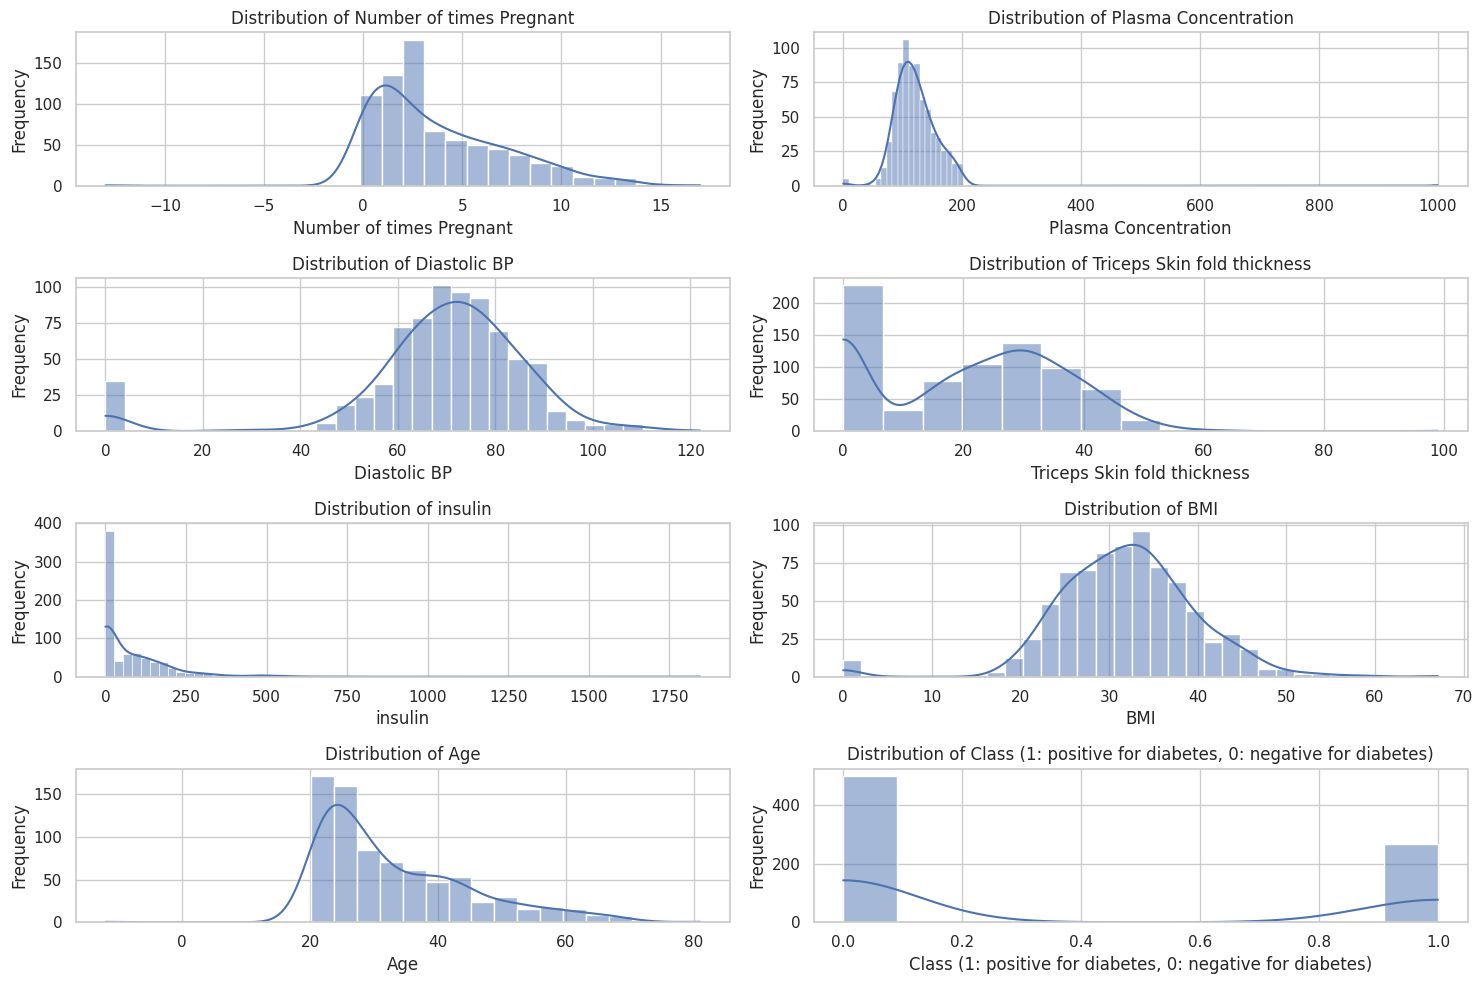

In [ ]:
def plot_all_distributions(data):
    num_columns = len(data.columns)
    num_rows = (num_columns - 1) // 2 + 1  # number of subplot rows

    plt.figure(figsize=(15, 10))

    for i, column_name in enumerate(data.columns, start=1):
        plt.subplot(num_rows, 2, i)
        sns.histplot(data[column_name], kde=True)
        plt.title(f'Distribution of {column_name}')
        plt.xlabel(column_name)
        plt.ylabel('Frequency')

    plt.tight_layout()
    plt.show()
plot_all_distributions(data)

above Distribution plots provide a concise visual summary of how data values are spread out.Few features are normally distributed and few are skewed. It helps to understand patterns, central tendencies, variability, skewness, and outliers in the data. These insights aid in understanding data characteristics, guiding data transformations, and making informed decisions for modeling and analysis. By comparing distributions of different variables, relationships and dependencies we can clearly see correlations and leading to a deeper understanding of the data.

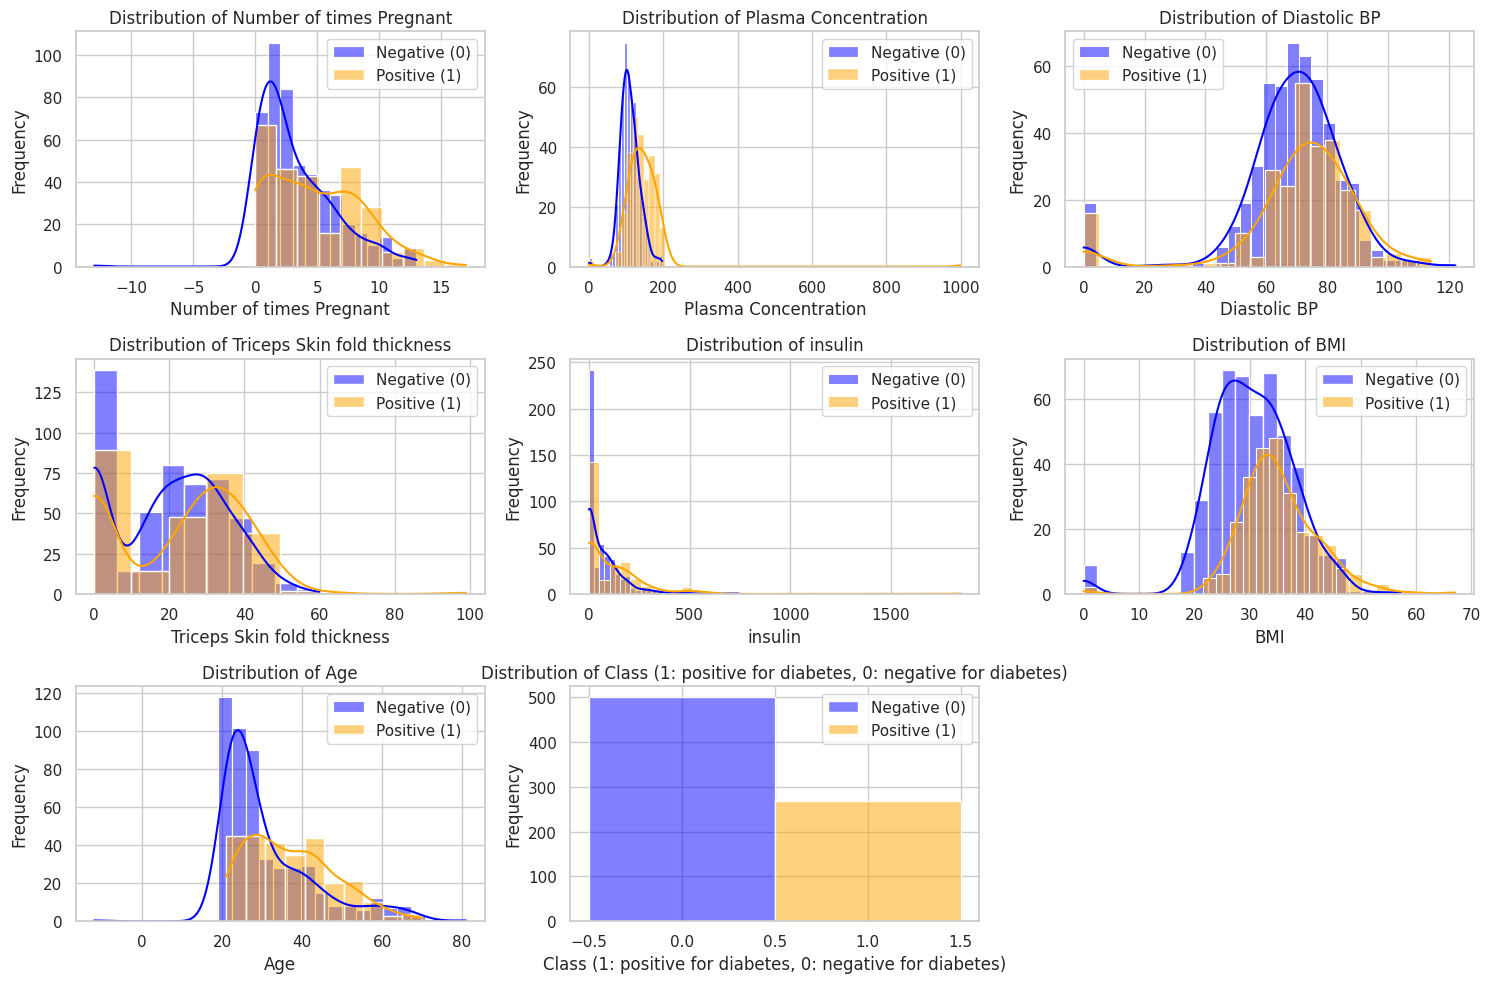

In [ ]:

def plot_column_distributions(data, target_column):
    plt.figure(figsize=(15, 10))

    for column_name in data.columns:
        plt.subplot(3, 3, data.columns.get_loc(column_name) + 1)
        sns.histplot(data[data[target_column] == 0][column_name], color='blue', label='Negative (0)', kde=True)
        sns.histplot(data[data[target_column] == 1][column_name], color='orange', label='Positive (1)', kde=True)

        plt.title(f'Distribution of {column_name}')
        plt.xlabel(column_name)
        plt.ylabel('Frequency')
        plt.legend()

    plt.tight_layout()
    plt.show()

target_column = 'Class (1: positive for diabetes, 0: negative for diabetes)'
plot_column_distributions(data, target_column)


The above plots shown the density distribution of the indivisual features with respect to target variable
It gives us more depth of the indipendent feature with the target varibale

8.0
6.0


<Axes: ylabel='Class (1: positive for diabetes, 0: negative for diabetes)'>

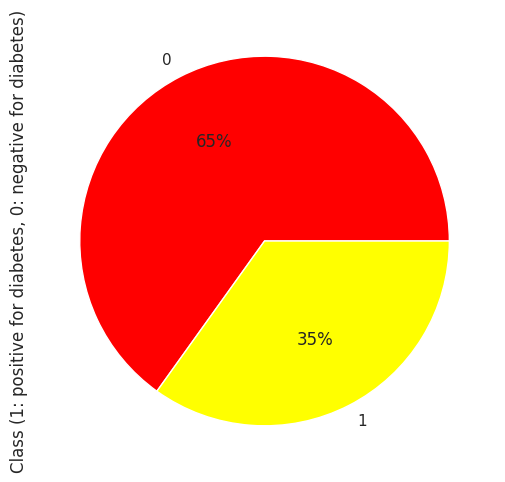

In [ ]:
'''plotting the target varible'''
plot_size = plt.rcParams["figure.figsize"]
print(plot_size[0])
print(plot_size[1])

plot_size[0] = 8
plot_size[1] = 6
plt.rcParams["figure.figsize"] = plot_size
data['Class (1: positive for diabetes, 0: negative for diabetes)'].value_counts().plot(kind='pie', autopct='%1.0f%%', colors=["red", "yellow", "green"])

target distribution looks fine , no need to do sampling

In [ ]:
# We have to handle the missing value , for the mormal distributed column , replaceing the missing value with the mean value
# and skewed data with meadian and binary value with mode
# Impute Missing Values
def impute_missing_values(column):
    if np.issubdtype(column.dtype, np.number):
        # Numeric columns (mean for normal, median for skewed)
        if column.name in ['Plasma Concentration', 'Diastolic BP', 'BMI']:
            return column.fillna(column.mean())
        else:
            return column.fillna(column.median())
    else:
        # Non-numeric columns (mode for binary)
        return column.fillna(column.mode()[0])

# Apply Imputation to All Columns
for column_name in data.columns:
    data[column_name] = impute_missing_values(data[column_name])


In [ ]:
#cross checking the null values
data.isnull().sum()

Number of times Pregnant                                      0
Plasma Concentration                                          0
Diastolic BP                                                  0
Triceps Skin fold thickness                                   0
insulin                                                       0
BMI                                                           0
Age                                                           0
Class (1: positive for diabetes, 0: negative for diabetes)    0
dtype: int64

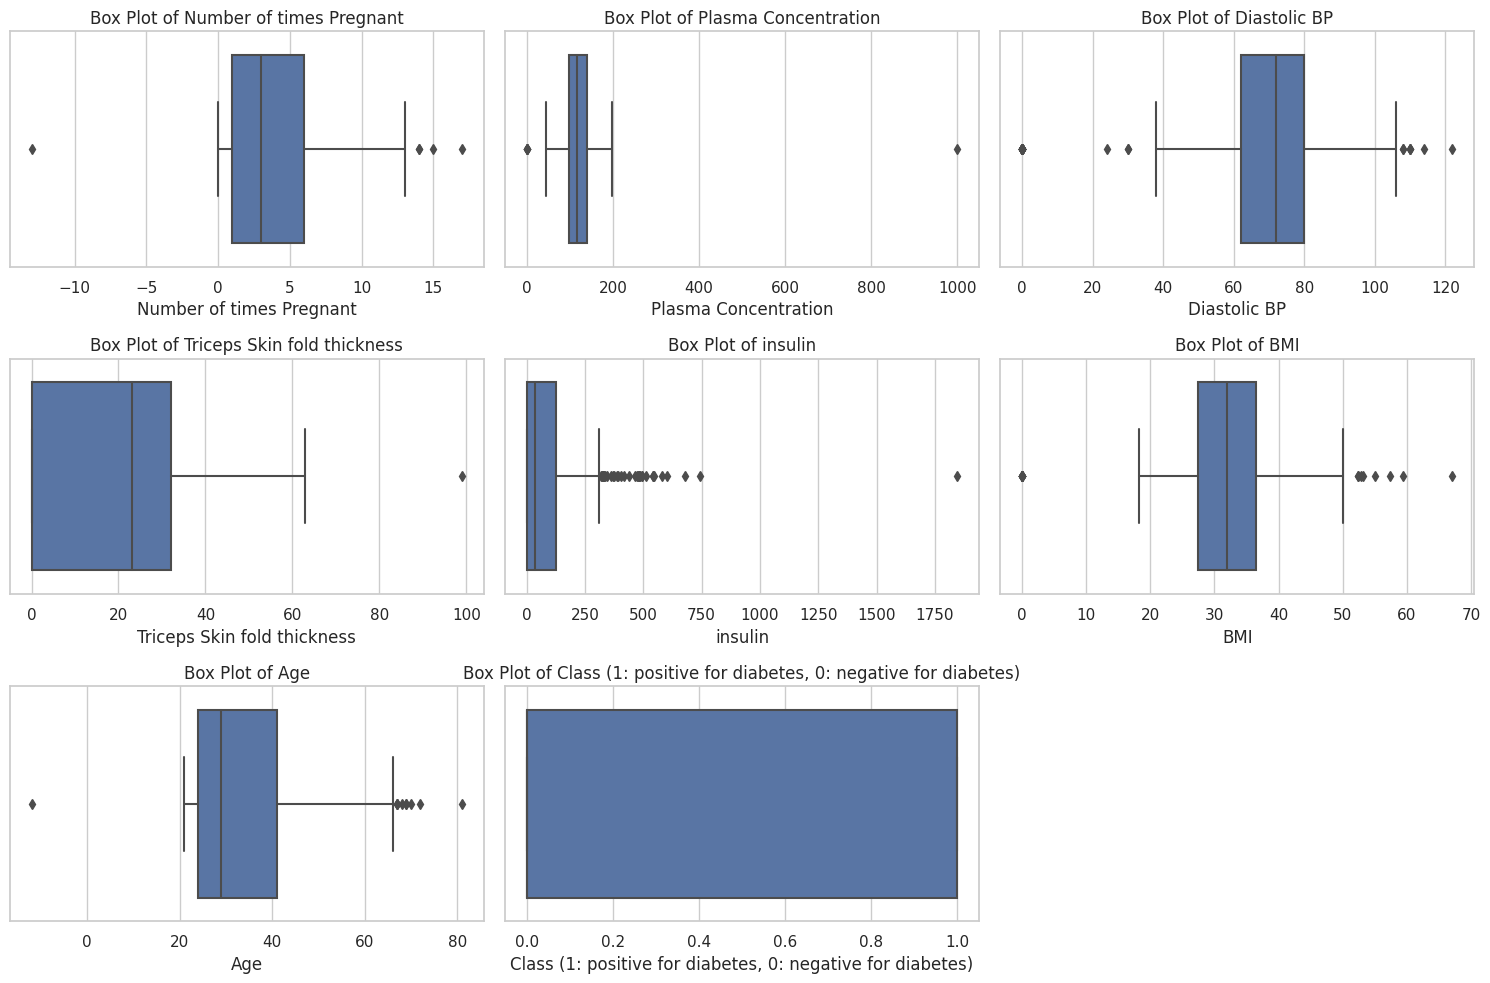

In [ ]:
#Box plot to visualize the outlier detection
def plot_box_plots(data):
    plt.figure(figsize=(15, 10))
    sns.set(style="whitegrid")
    for column_name in data.columns:
        plt.subplot(3, 3, data.columns.get_loc(column_name) + 1)
        sns.boxplot(x=data[column_name])
        plt.title(f'Box Plot of {column_name}')
        plt.xlabel(column_name)

    plt.tight_layout()
    plt.show()


plot_box_plots(data)


the above plots shown the outlies in the data , which is clerly seen left and right of the box

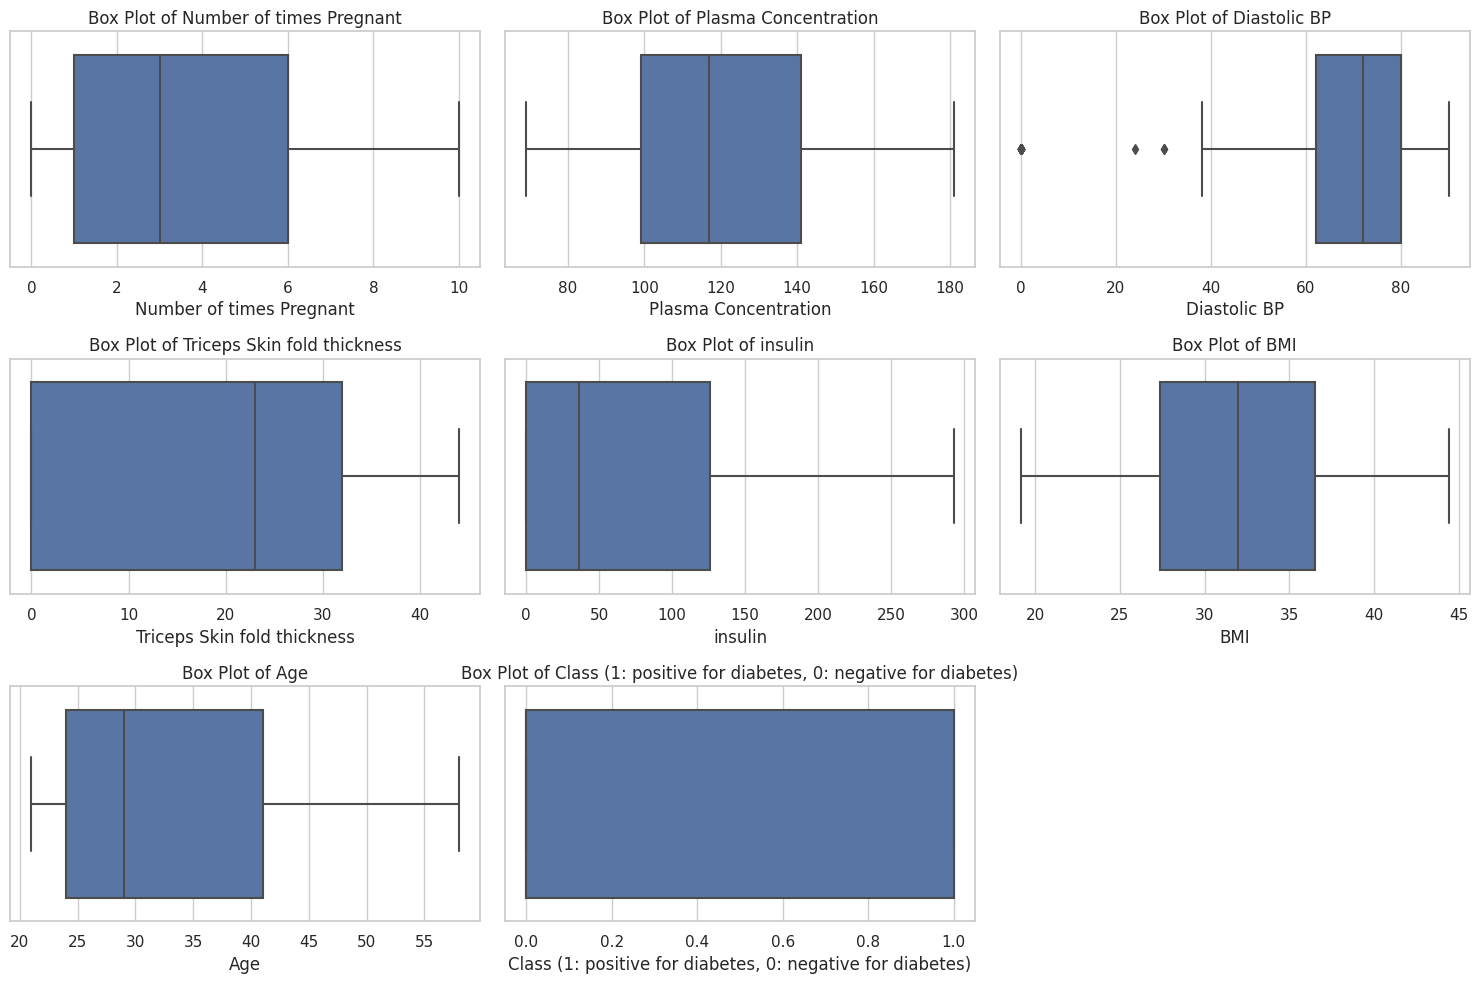

In [ ]:
# Replace Outliers with Maximum of 95th Percentile and Minimum of 2nd Percentile for All Columns
def replace_outliers_with_percentiles(column, lower_percentile=2, upper_percentile=95):
    lower_bound = np.percentile(column, lower_percentile)
    upper_bound = np.percentile(column, upper_percentile)
    column = np.where(column < lower_bound, lower_bound, column)
    column = np.where(column > upper_bound, upper_bound, column)
    return column

# Apply Replacement to All Columns
for column_name in data.columns:
    data[column_name] = replace_outliers_with_percentiles(data[column_name])

#Box plot to visualize the outlier detection(ploting to cross check box plot again to see the outlier removed/replaced or not)
def plot_box_plots(data):
    plt.figure(figsize=(15, 10))
    sns.set(style="whitegrid")

    for column_name in data.columns:
        plt.subplot(3, 3, data.columns.get_loc(column_name) + 1)
        sns.boxplot(x=data[column_name])
        plt.title(f'Box Plot of {column_name}')
        plt.xlabel(column_name)

    plt.tight_layout()
    plt.show()


plot_box_plots(data)

After the Replacing Outliers with Maximum of 95th Percentile and Minimum of 2nd Percentile for All Columns, and ploting the box plot again  to cross check whether the outliers have been removed

In [ ]:
data

,Number of times Pregnant,Plasma Concentration,Diastolic BP,Triceps Skin fold thickness,insulin,BMI,Age,"Class (1: positive for diabetes, 0: negative for diabetes)"
0,6.0,148.0,72.0,35.0,0.0,33.6,50.0,1.0
1,1.0,85.0,66.0,29.0,0.0,26.6,31.0,0.0
2,8.0,181.0,64.0,0.0,0.0,23.3,32.0,1.0
3,1.0,89.0,66.0,23.0,94.0,28.1,21.0,0.0
4,0.0,137.0,40.0,35.0,168.0,43.1,33.0,1.0
...,...,...,...,...,...,...,...,...
763,10.0,101.0,76.0,44.0,180.0,32.9,58.0,0.0
764,2.0,122.0,70.0,27.0,0.0,36.8,27.0,0.0
765,5.0,121.0,72.0,23.0,112.0,26.2,30.0,0.0
766,1.0,126.0,60.0,0.0,0.0,30.1,47.0,1.0


In [ ]:
#pearson correlation coefficient between -1 and 1
#-1 means negatively highly correlated and 1 is positively highly correalted and 0 means uncorrelate
#so near to 0 correlation value will be most acceptable
data.corr()

,Number of times Pregnant,Plasma Concentration,Diastolic BP,Triceps Skin fold thickness,insulin,BMI,Age,"Class (1: positive for diabetes, 0: negative for diabetes)"
Number of times Pregnant,1.000000,0.149254,0.143428,-0.085386,-0.075503,0.022718,0.575789,0.222325
Plasma Concentration,0.149254,1.000000,0.156037,0.057673,0.309476,0.242010,0.277625,0.491427
Diastolic BP,0.143428,0.156037,1.000000,0.218797,0.111850,0.226634,0.242360,0.059595
Triceps Skin fold thickness,-0.085386,0.057673,0.218797,1.000000,0.505298,0.393003,-0.116130,0.069164
insulin,-0.075503,0.309476,0.111850,0.505298,1.000000,0.215679,-0.053966,0.123598
BMI,0.022718,0.242010,0.226634,0.393003,0.215679,1.000000,0.064428,0.314133
Age,0.575789,0.277625,0.242360,-0.116130,-0.053966,0.064428,1.000000,0.261546
"Class (1: positive for diabetes, 0: negative for diabetes)",0.222325,0.491427,0.059595,0.069164,0.123598,0.314133,0.261546,1.000000


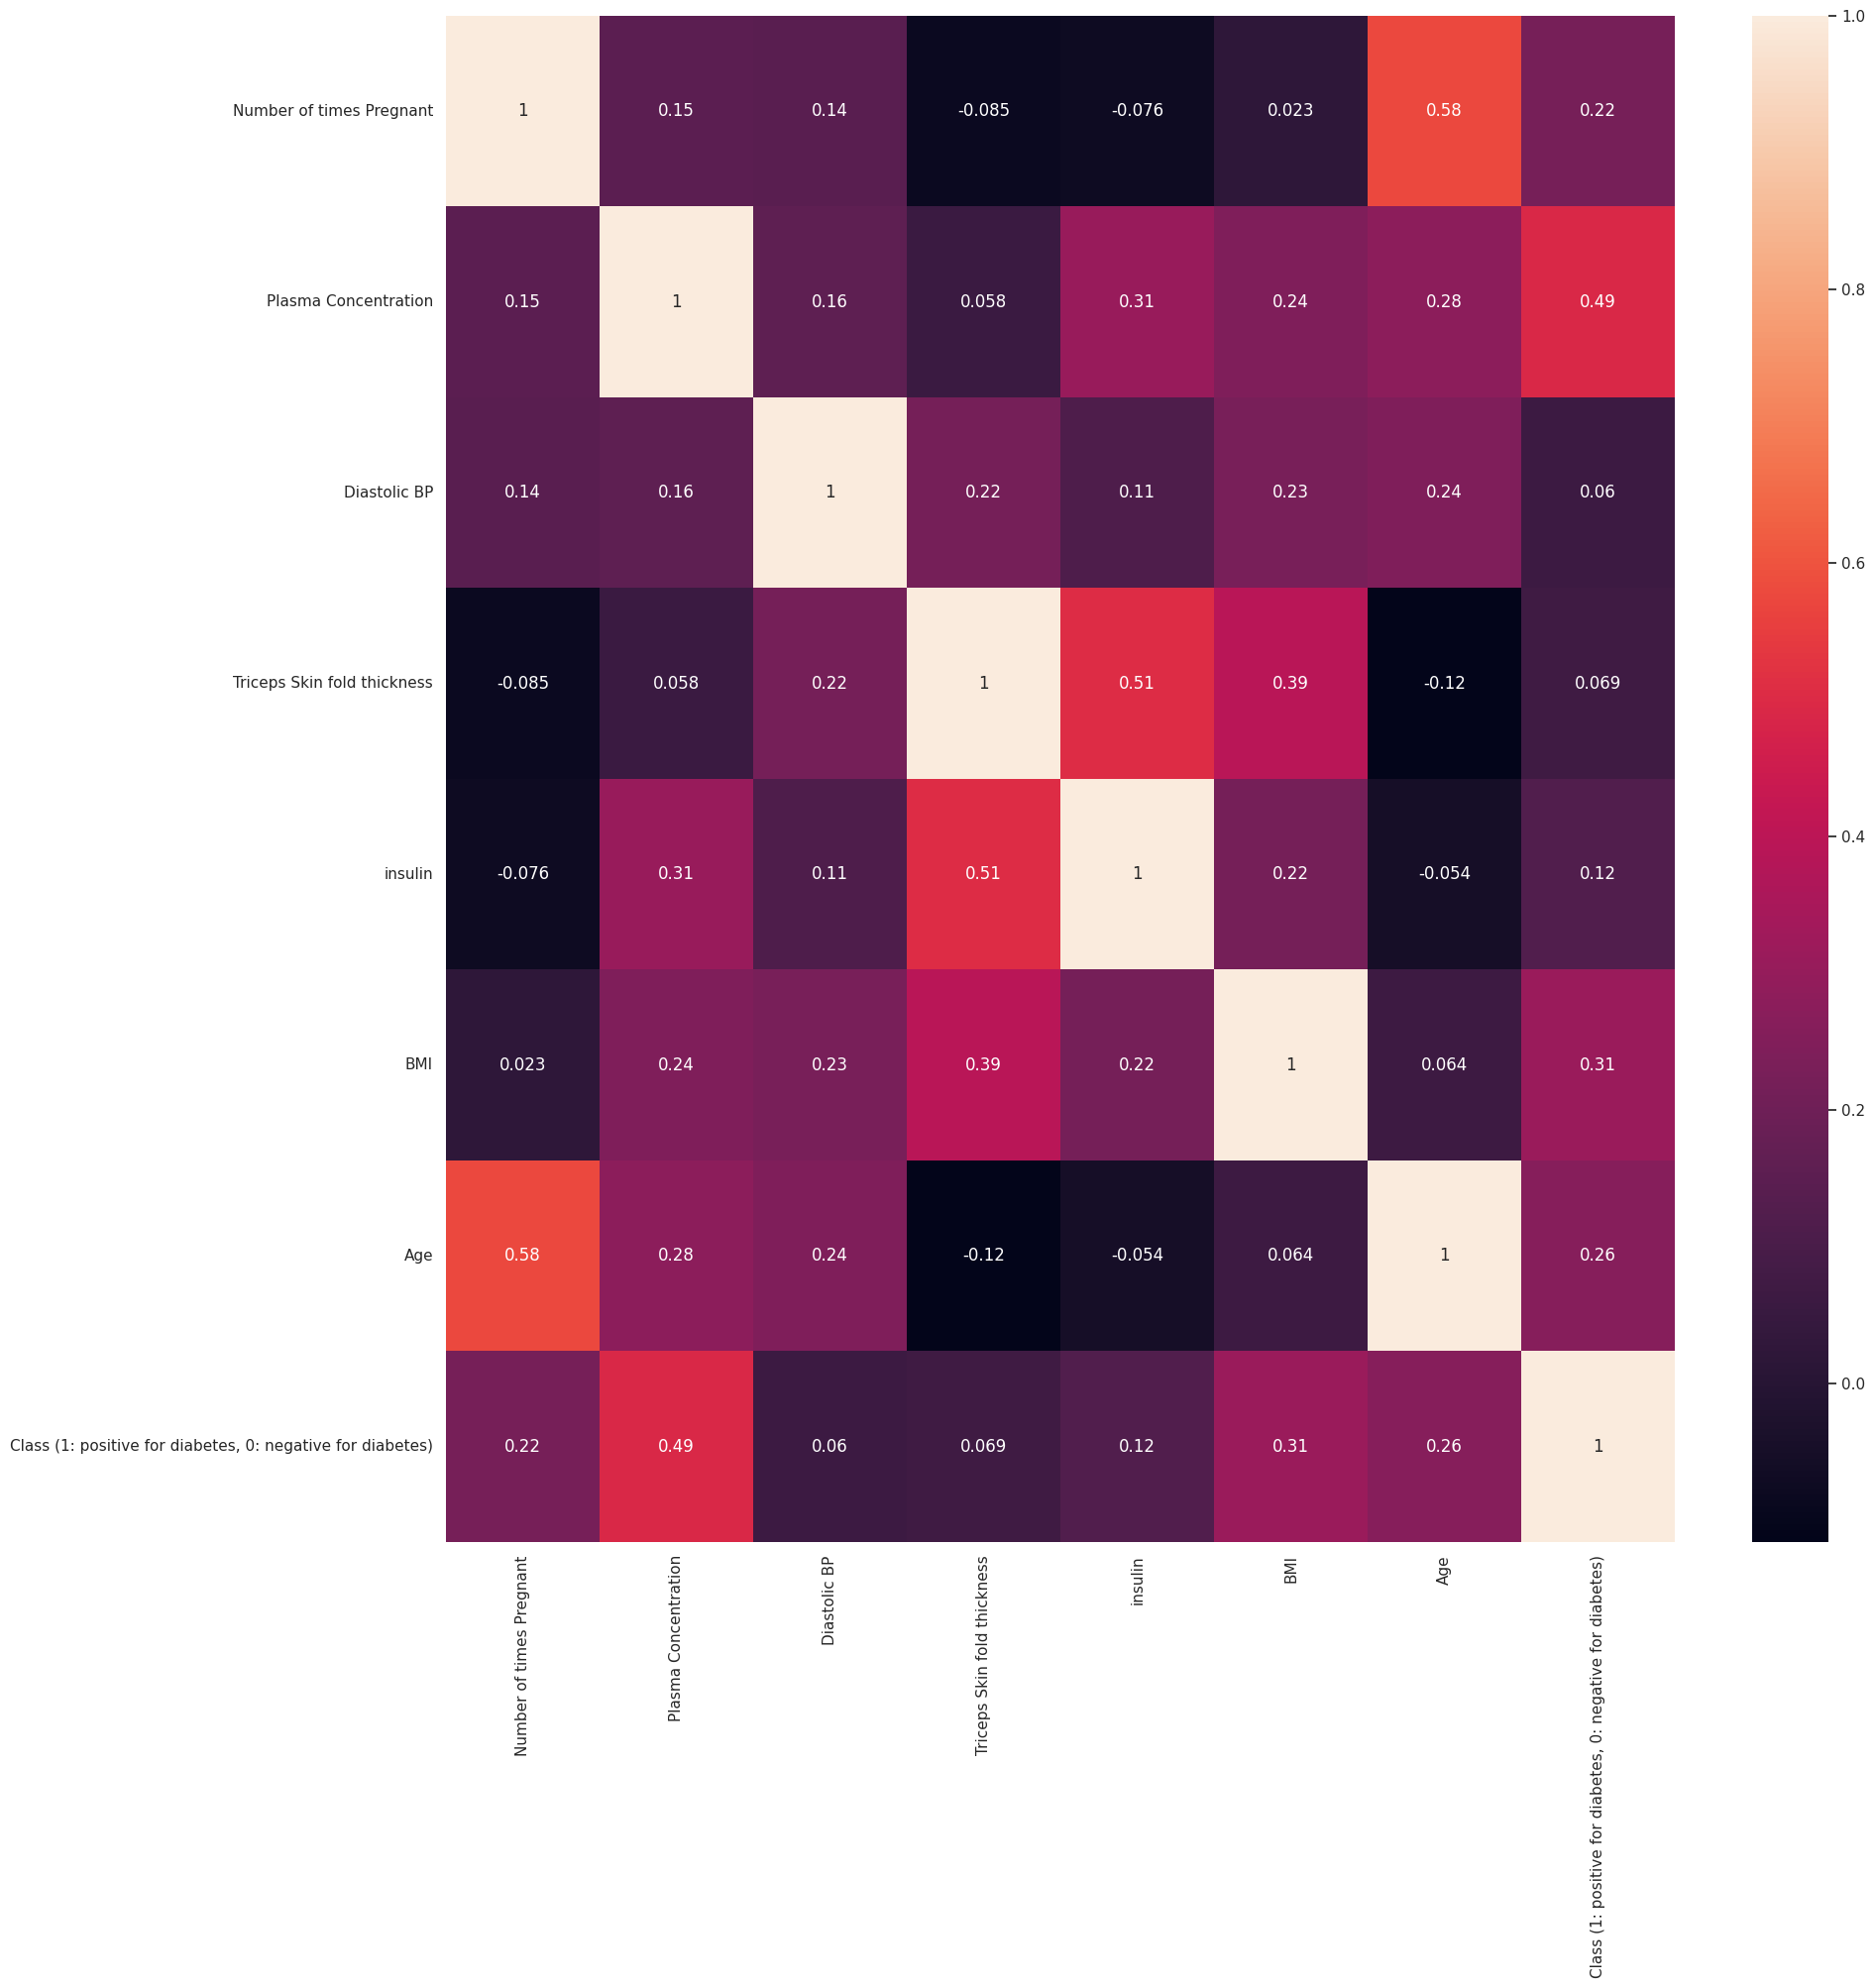

In [ ]:
#visualization of correlation matrix
matrix = data.corr()
plt.figure(figsize=(20,20))
sns.heatmap(matrix, annot=True)
plt.show()

1:number of times pregnent is correlated with age

2:triceps skin fold thikness is correlated with insulin

3:plasma concentration is correlated with target variable

In [ ]:
# Feature Engineering
data['BMI_Category'] = pd.cut(data['BMI'], bins=[0, 18.5, 24.9, 29.9, float('inf')], labels=['Underweight', 'Normal', 'Overweight', 'Obese'])
data['Age_Group'] = pd.cut(data['Age'], bins=[0, 30, 60, float('inf')], labels=['Young', 'Middle-aged', 'Senior'])
data['Age_BMI_Ratio'] = data['Age'] / data['BMI']
data['Diabetes_Risk_Score'] = 0.5 * data['Plasma Concentration'] + 0.3 * data['insulin'] + 0.2 * data['BMI']#https://diabetesjournals.org/care/article/26/3/725/29197/The-Diabetes-Risk-ScoreA-practical-tool-to-predict
data['Interaction_Age_Plasma'] = data['Age'] * data['Plasma Concentration']
data['Interaction_Age_BMI'] = data['Age'] * data['BMI']
data['Interaction_BMI_Plasma'] = data['BMI'] * data['Plasma Concentration']
data['Log_Plasma'] = data['Plasma Concentration'].apply(lambda x: max(x, 1))  # To handle zero values
data['Log_Insulin'] = data['insulin'].apply(lambda x: max(x, 1))  # To handle zero values
# Perform One-Hot Encoding
data = pd.get_dummies(data, columns=['BMI_Category', 'Age_Group'], drop_first=True)



I am doing feature engineering to manupulate the data so that model can understand better, There is no gaurantee to increase the performence of the model but doing hit and trail and derive the featue in such a way that might work to improve the performnece of teh model.
log transformations prevent taking the logarithm of zero, which is undefined in mathematics. By ensuring that the values are at least 1 before applying the logarithm transformation, you can handle cases where the original feature has zero values without causing errors in your calculations.

In [ ]:
data=data.drop(['Age_Group_Senior'], axis=1)
data

,Number of times Pregnant,Plasma Concentration,Diastolic BP,Triceps Skin fold thickness,insulin,BMI,Age,"Class (1: positive for diabetes, 0: negative for diabetes)",Age_BMI_Ratio,Diabetes_Risk_Score,Interaction_Age_Plasma,Interaction_Age_BMI,Interaction_BMI_Plasma,Log_Plasma,Log_Insulin,BMI_Category_Normal,BMI_Category_Overweight,BMI_Category_Obese,Age_Group_Middle-aged
0,6.0,148.0,72.0,35.0,0.0,33.6,50.0,1.0,1.488095,80.72,7400.0,1680.0,4972.8,148.0,1.0,0,0,1,1
1,1.0,85.0,66.0,29.0,0.0,26.6,31.0,0.0,1.165414,47.82,2635.0,824.6,2261.0,85.0,1.0,0,1,0,1
2,8.0,181.0,64.0,0.0,0.0,23.3,32.0,1.0,1.373391,95.16,5792.0,745.6,4217.3,181.0,1.0,1,0,0,1
3,1.0,89.0,66.0,23.0,94.0,28.1,21.0,0.0,0.747331,78.32,1869.0,590.1,2500.9,89.0,94.0,0,1,0,0
4,0.0,137.0,40.0,35.0,168.0,43.1,33.0,1.0,0.765661,127.52,4521.0,1422.3,5904.7,137.0,168.0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
763,10.0,101.0,76.0,44.0,180.0,32.9,58.0,0.0,1.762918,111.08,5858.0,1908.2,3322.9,101.0,180.0,0,0,1,1
764,2.0,122.0,70.0,27.0,0.0,36.8,27.0,0.0,0.733696,68.36,3294.0,993.6,4489.6,122.0,1.0,0,0,1,0
765,5.0,121.0,72.0,23.0,112.0,26.2,30.0,0.0,1.145038,99.34,3630.0,786.0,3170.2,121.0,112.0,0,1,0,0
766,1.0,126.0,60.0,0.0,0.0,30.1,47.0,1.0,1.561462,69.02,5922.0,1414.7,3792.6,126.0,1.0,0,0,1,1


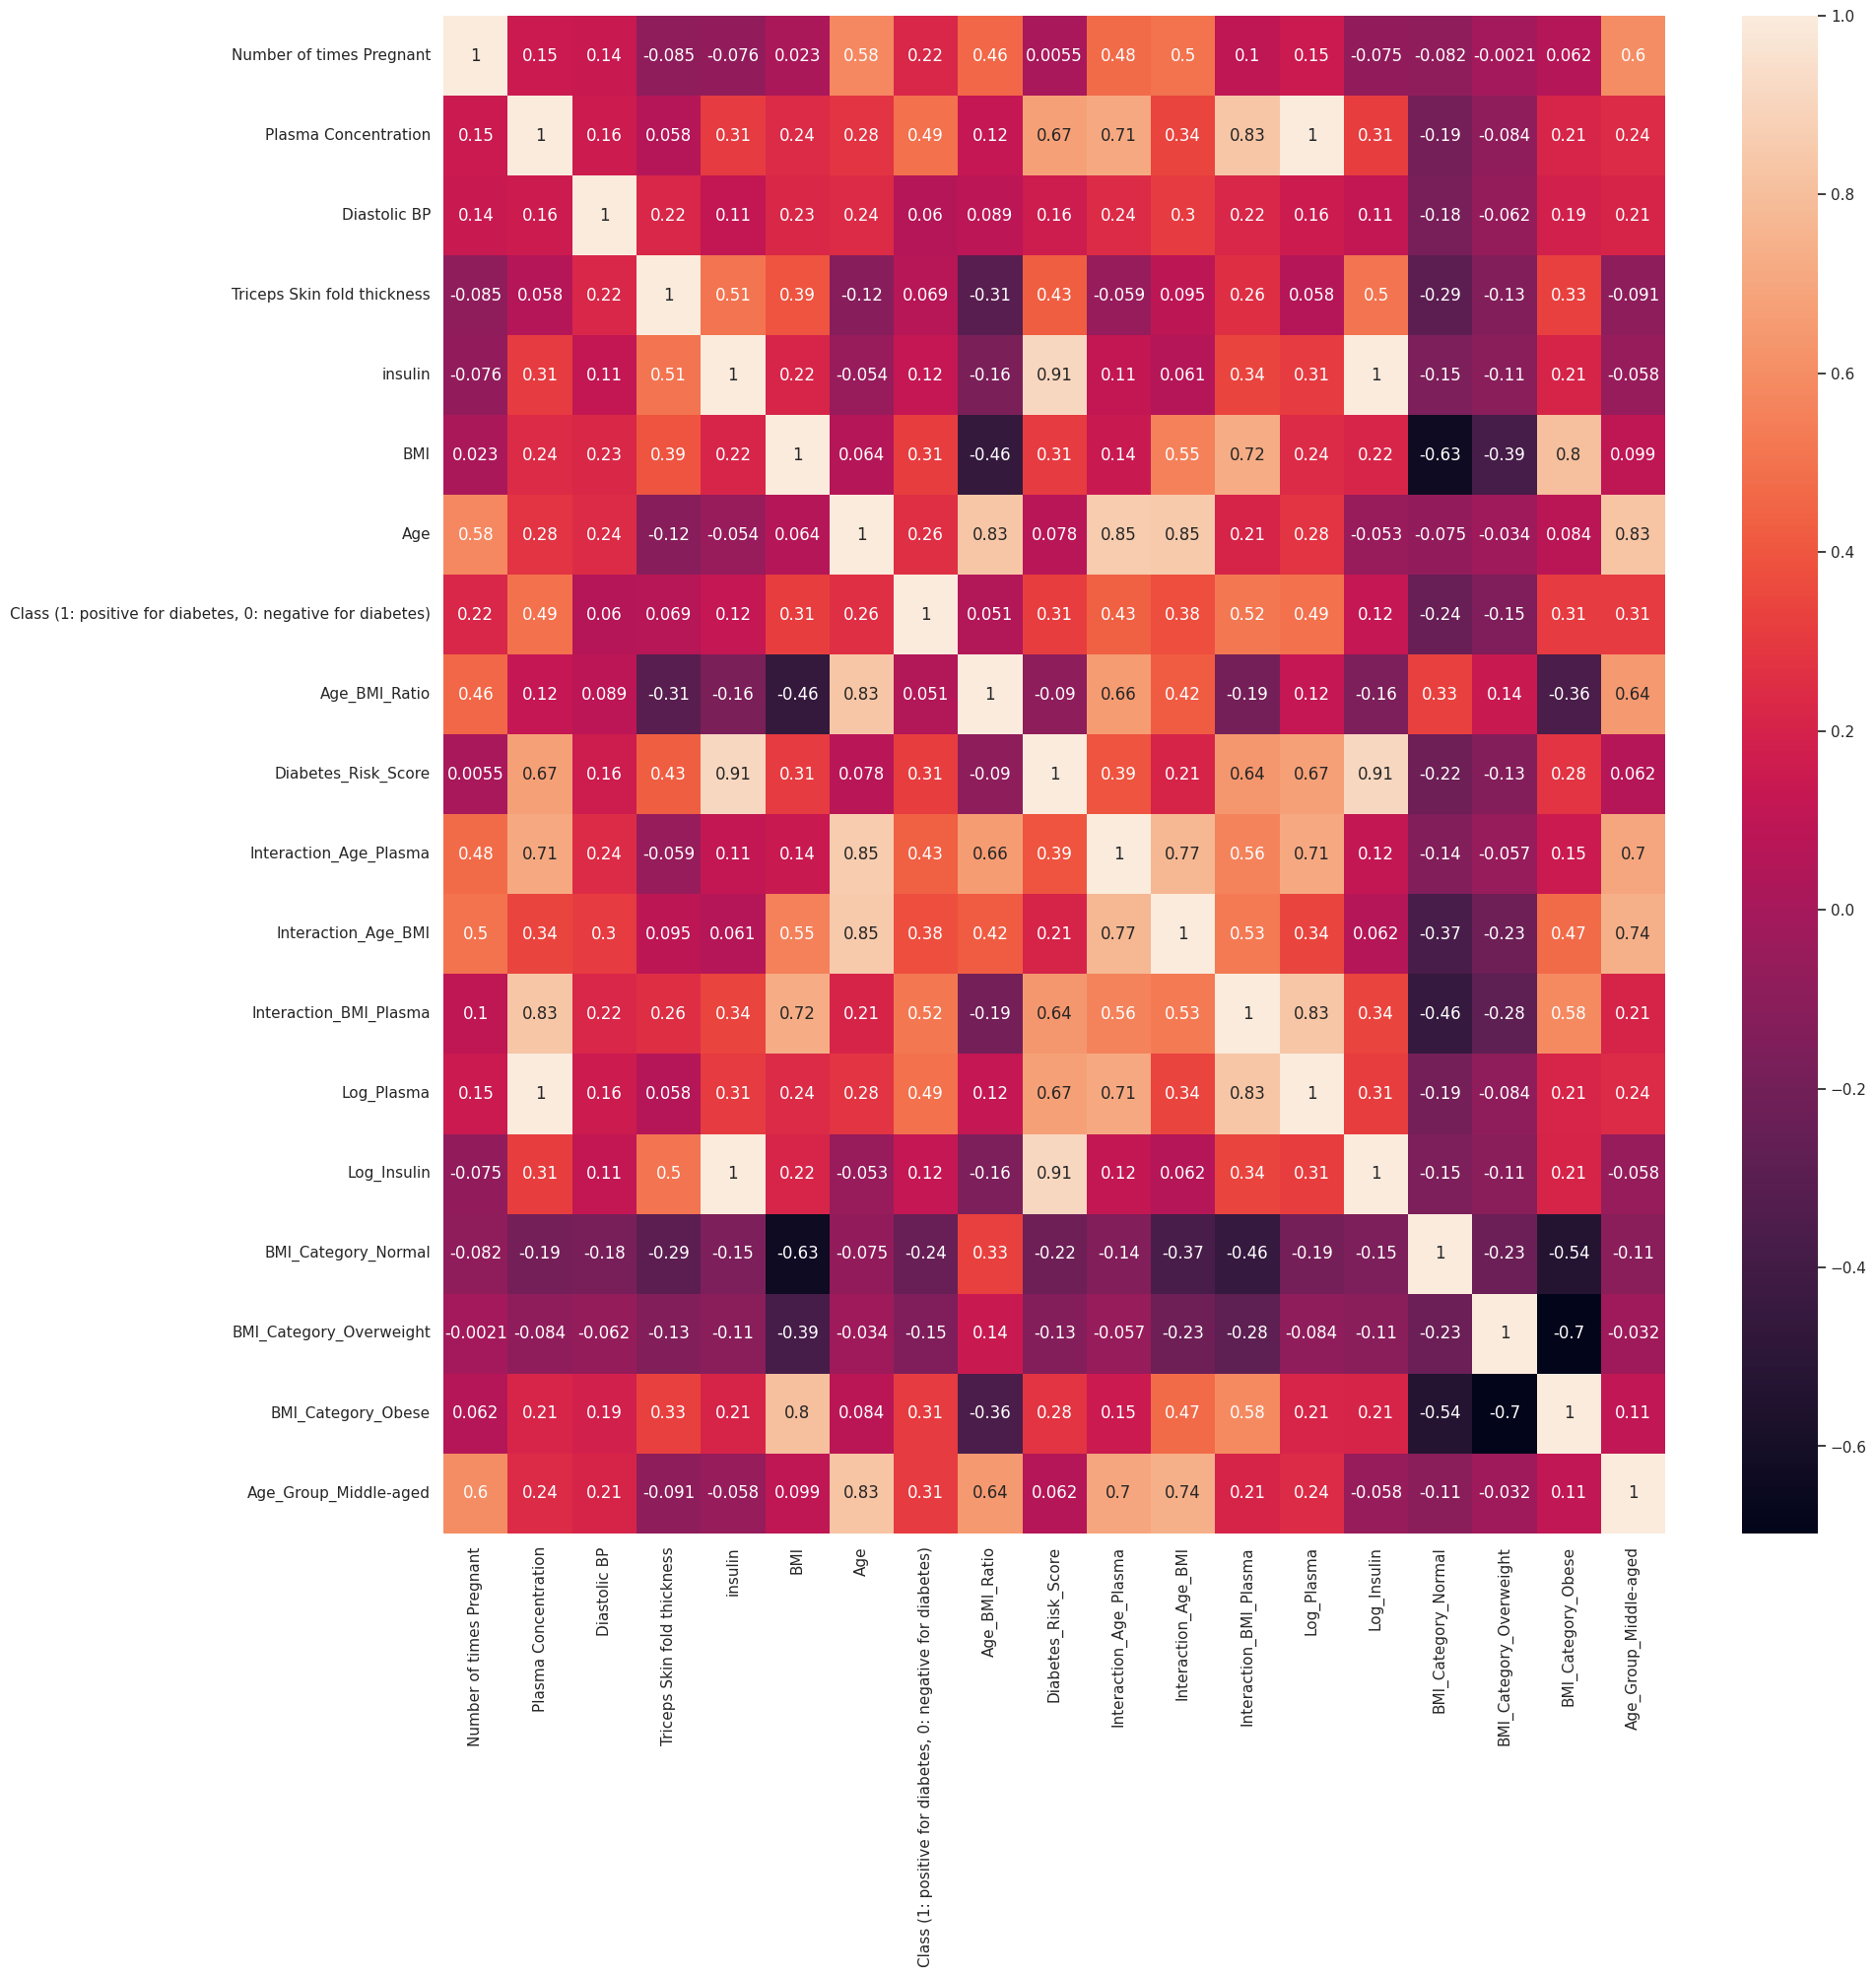

In [ ]:
#after feature engineering we need to see the correration again,
#becouse it might be possible some feature might be highly correlate which introduce the multicolleleniearity in the model
#visualization of correlation matrix
matrix = data.corr()
plt.figure(figsize=(20,20))
sns.heatmap(matrix, annot=True)
plt.show()

After feature engineering , we can see some features are highly correlated so we have to enginnered the feature in such way that it will not add the garbage or negative data into the model

In [ ]:
data=data.drop(['Log_Plasma','Log_Insulin'], axis=1)

In [ ]:
'''X is the independent features and y is the dependent(target) features'''
X = data.drop('Class (1: positive for diabetes, 0: negative for diabetes)',axis=1)
y = data['Class (1: positive for diabetes, 0: negative for diabetes)']

In [ ]:
#Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 20)

In [ ]:
# Scale the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
# Initialize the logistic regression model with a higher max_iter
log_reg_model = LogisticRegression(max_iter=1000, C=1,solver = 'lbfgs')

In [ ]:
#hyperparameter tuning for logist regression
# param_grid = {
#     'C': [0.001, 0.01, 0.1, 1, 10],  # Regularization strength values to try
#     'solver': ['lbfgs', 'liblinear', 'saga']  # Solver algorithms to try
# }

# # Perform grid search using cross-validation
# grid_search = GridSearchCV(log_reg_model, param_grid, cv=5, scoring='accuracy')
# grid_search.fit(X_train_scaled, y_train)

# # Get the best hyperparameters and best model
# best_params = grid_search.best_params_
# best_model = grid_search.best_estimator_
# print(best_params)

In [ ]:
# Train the model on the scaled training data
log_reg_model.fit(X_train_scaled, y_train)
# Get the training accuracy score
training_score_l = log_reg_model.score(X_train_scaled, y_train)
print("Training Accuracy Score:", training_score_l)
# Make predictions on the scaled testing data
y_pred = log_reg_model.predict(X_test_scaled)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Display the classification report with precision, recall, F1-score, etc.
print("Classification Report:Logistic regreesion")
print(classification_report(y_test, y_pred))

 #Calculate ROC-AUC
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
# Calculate the Area Under the ROC Curve (AUC-ROC)
auc = roc_auc_score(y_test, y_pred)
print(auc)



from sklearn.model_selection import cross_val_score, KFold

# Perform K-Fold cross-validation
kfold = KFold(n_splits=5, shuffle=True, random_state=42)  # Choose appropriate values

# Cross-validate the logistic regression model
cross_val_scores = cross_val_score(log_reg_model, X_train_scaled, y_train, cv=kfold, scoring='accuracy')

print("Cross-Validation Scores:", cross_val_scores)
print("Mean Cross-Validation Accuracy:", cross_val_scores.mean())

Training Accuracy Score: 0.7752442996742671
Accuracy: 0.7532467532467533
Classification Report:Logistic regreesion
              precision    recall  f1-score   support

         0.0       0.79      0.85      0.82       101
         1.0       0.67      0.57      0.61        53

    accuracy                           0.75       154
   macro avg       0.73      0.71      0.72       154
weighted avg       0.75      0.75      0.75       154

0.7087614421819539
Cross-Validation Scores: [0.72357724 0.80487805 0.73170732 0.83739837 0.74590164]
Mean Cross-Validation Accuracy: 0.7686925229908037


                        feature  importance
1          Plasma Concentration    0.164592
15        Age_Group_Middle-aged    0.116911
9        Interaction_Age_Plasma    0.089113
12          BMI_Category_Normal    0.086130
5                           BMI    0.080304
11       Interaction_BMI_Plasma    0.073527
2                  Diastolic BP    0.069503
0      Number of times Pregnant    0.048333
14           BMI_Category_Obese    0.046759
4                       insulin    0.046075
10          Interaction_Age_BMI    0.044427
7                 Age_BMI_Ratio    0.042711
8           Diabetes_Risk_Score    0.037328
6                           Age    0.035456
13      BMI_Category_Overweight    0.018300
3   Triceps Skin fold thickness    0.000531


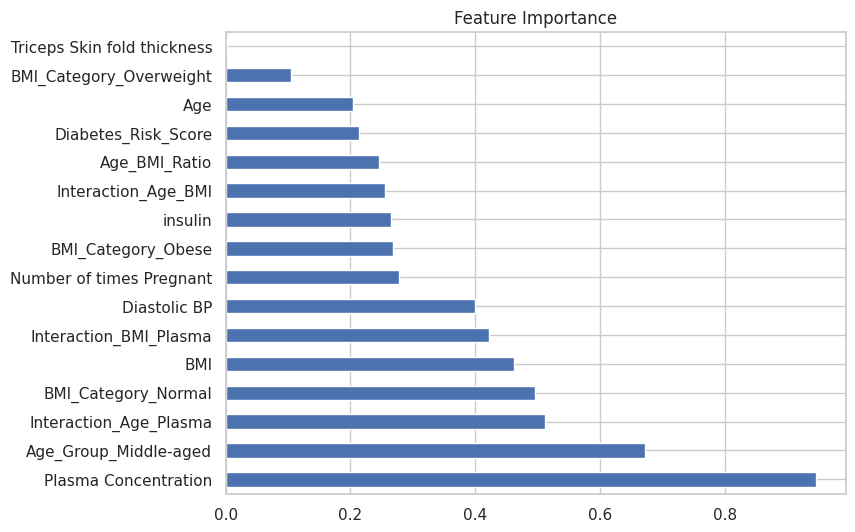

In [ ]:
#feature importence
importance = log_reg_model.coef_[0]
#importance is a list so you can plot it.
feat_importances = pd.Series(importance, index=X_test.columns)
abs(feat_importances).nlargest(21).plot(kind='barh',title = 'Feature Importance')

# Get the coefficients of the logistic regression model
coefs = log_reg_model.coef_[0]

# Get the feature importances by taking the absolute value of the coefficients
importance = abs(coefs)

# Normalize the feature importances to get their relative importance
importance = importance / importance.sum()

# Create a dataframe to store the feature names and their importances
df_importance = pd.DataFrame({"feature": X.columns, "importance": importance})

# Sort the dataframe by the importance column
df_importance = df_importance.sort_values(by="importance", ascending=False)

# Print the top 5 most important features
print(df_importance)#.head(5))

In [ ]:
from sklearn.tree import DecisionTreeClassifier
decision_tree_model = DecisionTreeClassifier(max_depth=5, min_samples_split=2)
decision_tree_model.fit(X_train_scaled, y_train)

# Make predictions on the scaled testing data using the decision tree
y_pred_decision_tree = decision_tree_model.predict(X_test_scaled)

# Calculate the accuracy of the decision tree model
accuracy_decision_tree = accuracy_score(y_test, y_pred_decision_tree)
print("Accuracy (Decision Tree):", accuracy_decision_tree)

# Display the classification report for the decision tree
print("Classification Report (Decision Tree):")
print(classification_report(y_test, y_pred_decision_tree))

Accuracy (Decision Tree): 0.6948051948051948
Classification Report (Decision Tree):
              precision    recall  f1-score   support

         0.0       0.73      0.84      0.78       101
         1.0       0.58      0.42      0.48        53

    accuracy                           0.69       154
   macro avg       0.66      0.63      0.63       154
weighted avg       0.68      0.69      0.68       154



In [ ]:
from sklearn.svm import SVC
# Assuming you have X_train_scaled, X_test_scaled, y_train, and y_test

# Initialize the Support Vector Classifier (SVC) model
svc_model = SVC(C=0.1 ,kernel='rbf' , gamma='scale' )

# Train the model on the scaled training data
svc_model.fit(X_train_scaled, y_train)

# Get the training accuracy score
training_score_svc = svc_model.score(X_train_scaled, y_train)
print("Training Accuracy Score (SVC):", training_score_svc)

# Make predictions on the scaled testing data
y_pred_svc = svc_model.predict(X_test_scaled)

# Calculate the accuracy of the SVC model
accuracy_svc = accuracy_score(y_test, y_pred_svc)
print("Accuracy (SVC):", accuracy_svc)

# Display the classification report with precision, recall, F1-score, etc.
print("Classification Report (SVC):")
print(classification_report(y_test, y_pred_svc))


Training Accuracy Score (SVC): 0.7833876221498371
Accuracy (SVC): 0.7597402597402597
Classification Report (SVC):
              precision    recall  f1-score   support

         0.0       0.76      0.92      0.83       101
         1.0       0.75      0.45      0.56        53

    accuracy                           0.76       154
   macro avg       0.76      0.69      0.70       154
weighted avg       0.76      0.76      0.74       154



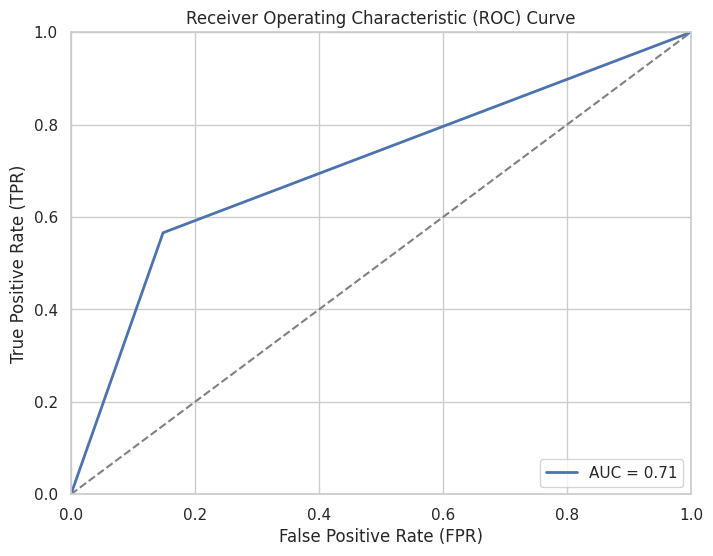

In [ ]:
# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='b', lw=2, label=f'AUC = {auc:.2f}')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

Training Accuracy Score: 0.8615635179153095
Accuracy: 0.7272727272727273
Classification Report:Xtreme Gradient boosting
              precision    recall  f1-score   support

         0.0       0.76      0.86      0.81       101
         1.0       0.64      0.47      0.54        53

    accuracy                           0.73       154
   macro avg       0.70      0.67      0.67       154
weighted avg       0.72      0.73      0.72       154

AUC-ROC: 0.7976835419390996


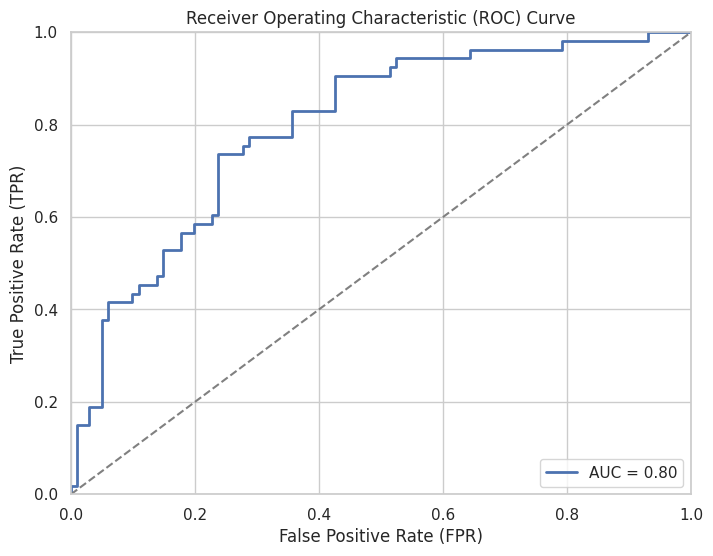

In [ ]:
# Initialize the XGBoost model
xgb_model = xgb.XGBClassifier( learning_rate=0.1, max_depth=3,min_child_weight=1, n_estimators=50)

# Train the model on the scaled training data
xgb_model.fit(X_train, y_train)

# Get the training accuracy score
training_score = xgb_model.score(X_train, y_train)
print("Training Accuracy Score:", training_score)
# Make predictions on the scaled testing data
y_pred = xgb_model.predict(X_test)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Display the classification report (evaluation report)
print("Classification Report:Xtreme Gradient boosting")
print(classification_report(y_test, y_pred))

# Predict probabilities on the scaled testing data for ROC curve
y_prob = xgb_model.predict_proba(X_test)[:, 1]

# Calculate the Area Under the ROC Curve (AUC-ROC)
auc = roc_auc_score(y_test, y_prob)
print("AUC-ROC:", auc)

# Plot the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='b', lw=2, label=f'AUC = {auc:.2f}')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

In [ ]:
'''feature importence by the XGBoost model'''
# # Get feature importances
# importances = xgb_model.feature_importances_
# feature_names = X_train.columns  # Replace with your actual feature names
# sorted_indices = importances.argsort()[::-1]
# # Plot feature importances
# plt.figure(figsize=(10, 6))
# plt.bar(range(len(importances)), importances[sorted_indices], tick_label=feature_names[sorted_indices])
# plt.xticks(rotation=90)
# plt.xlabel('Feature')
# plt.ylabel('Importance')
# plt.title('XGBoost Feature Importance')
# plt.tight_layout()
# plt.show()

'feature importence by the XGBoost model'

In [ ]:
'''It will take huge amount of time '''
#hyperparameter tuning for XGBoost model
# param_grid = {
#     'learning_rate': [0.001, 0.01, 0.1],
#     'n_estimators': [50, 100, 200],
#     'max_depth': [3, 5, 7],
#     'reg_alpha': [0, 0.01, 0.1, 1],  # L1 regularization (Lasso)
#     'reg_lambda': [0, 0.01, 0.1, 1],  # L2 regularization (Ridge)
#     'min_child_weight': [1, 5, 10]    # Gamma regularization (Minimum Child Weight)
# }

# # Perform grid search using cross-validation
# grid_search = GridSearchCV(xgb_model, param_grid, cv=5, scoring='accuracy')
# grid_search.fit(X_train_res, y_train_res)

# # Get the best hyperparameters and best model
# best_params = grid_search.best_params_
# # best_model = grid_search.best_estimator_

'It will take huge amount of time '

In [ ]:
#print(best_params)
# print(best_model)

Training Accuracy Score: 0.7899022801302932
Accuracy: 0.7727272727272727
Classification Report:Random Forest
              precision    recall  f1-score   support

         0.0       0.78      0.92      0.84       101
         1.0       0.76      0.49      0.60        53

    accuracy                           0.77       154
   macro avg       0.77      0.71      0.72       154
weighted avg       0.77      0.77      0.76       154

AUC-ROC: 0.8292546235755651


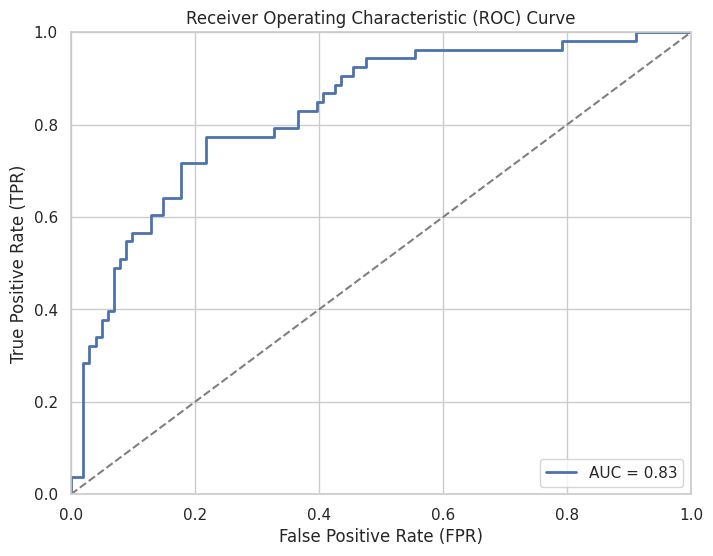

In [ ]:
# Initialize the RandomForestClassifier model
rf_model = RandomForestClassifier(n_estimators=100, max_depth=2, min_samples_leaf= 2, min_samples_split=2,random_state=42)
rf_model.fit(X_train, y_train)
training_score = rf_model.score(X_train, y_train)
print("Training Accuracy Score:", training_score)

# Make predictions on the scaled testing data
y_pred = rf_model.predict(X_test)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("Classification Report:Random Forest")
print(classification_report(y_test, y_pred))

# Predict probabilities on the scaled testing data for ROC curve
y_prob = rf_model.predict_proba(X_test)[:, 1]

# Calculate the Area Under the ROC Curve (AUC-ROC)
auc = roc_auc_score(y_test, y_prob)
print("AUC-ROC:", auc)

# Plot the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='b', lw=2, label=f'AUC = {auc:.2f}')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()


In [ ]:
# # Define the hyperparameter grid for Grid Search
# param_grid = {
#     'n_estimators': [50, 100, 200],
#     'max_depth': [None, 10, 20, 30],
#     'min_samples_split': [2, 5, 10],
#     'min_samples_leaf': [1, 2, 4],
#     'max_features': ['auto', 'sqrt', 'log2']
# }

# # Create the GridSearchCV object
# grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=5, n_jobs=-1)

# # Fit the grid search to the training data
# grid_search.fit(X_train, y_train)

# # Get the best parameters and best score
# best_params = grid_search.best_params_
# best_score = grid_search.best_score_

# print("Best Parameters:", best_params)
# print("Best Score:", best_score)


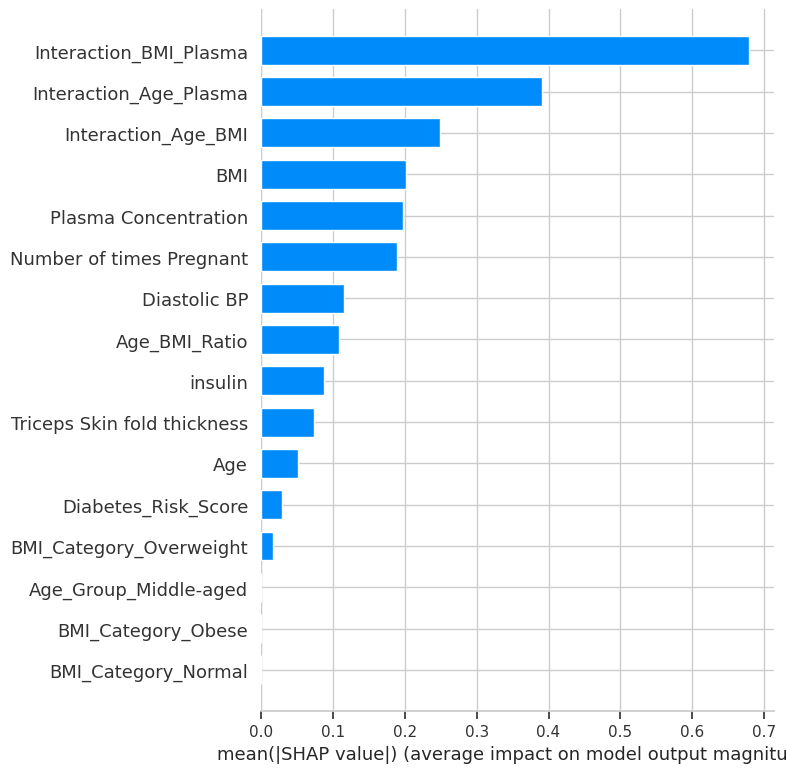

In [ ]:
# Create a SHAP explainer for xtreme gradient boosting model
explainer = shap.Explainer(xgb_model, X_train)
shap_values = explainer.shap_values(X_train)
X_train_inverse = pd.DataFrame(X_train, columns=X_train.columns)
shap.summary_plot(shap_values, X_train_inverse, plot_type='bar')

the above bar graph shown the feature importence to predict the outcomes in Descending order

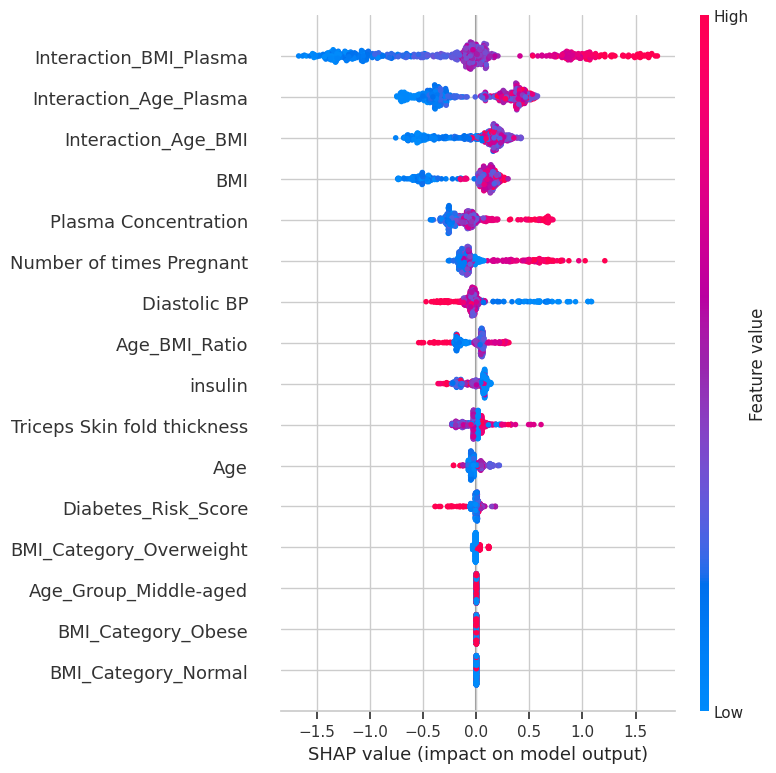

In [ ]:
# Create a bee swarm plot of SHAP values for each feature
shap.summary_plot(shap_values, X_train_inverse , plot_type='dot')


The above shapley value plot will indicate the which perticular row and columns are impacting to predict the outcomes , whether it is positively impacting or negatively impacting


**Conclusions:**

1. **Importance of Recall:** In a medical context like diagnosing diabetes, false negatives are critical to avoid. A false negative could mean a patient with diabetes goes undiagnosed, leading to potential health risks. Therefore, prioritizing recall (the ability to correctly identify positive cases) is crucial. This ensures that as few cases of diabetes as possible are missed by the model.

2. **Feature Confusion:** It was observed that certain features, such as Diastolic BP, might confuse the model. However, removing this feature did not lead to a significant improvement in recall. This suggests that the model's predictive power relies on a combination of features, and removing one feature alone may not substantially impact its performance.

3. **Addressing Underfitting:** The analysis highlighted that the model could be underfitting due to the relatively low number of features. Underfitting occurs when a model is too simple to capture the complexity of the data. To address this, the suggestion was made to manipulate or engineer new features. This can enhance the model's ability to capture underlying patterns in the data, potentially leading to improved predictions.

4. **Probabilistic Predictions:** The recommendation to predict probabilities instead of binary outcomes provides a more nuanced understanding of the model's predictions. This can be especially useful for decision-making, as it offers insight into the model's confidence in its predictions and allows for better risk assessment.

5. **Data Preprocessing:** The steps taken to preprocess the data, such as plotting each feature's nature, using box plots to detect outliers, and handling missing values through statistical analysis, demonstrate a comprehensive approach to ensuring the quality and reliability of the dataset.

6. **Model Evaluation:** Different models were evaluated, including Logistic Regression, XGBoost, and Random Forest. Hyperparameter tuning was applied to optimize their performance. This demonstrates a thorough exploration of various algorithms and their configurations to find the best-fit model for the task.

7. **Emphasizing Recall:** The analysis recognized that improving recall is a primary focus, given the importance of correctly identifying positive cases. The efforts to enhance the model's recall can lead to better patient care and diagnostic accuracy.

8. **Feature Importance:** Identifying the number of important features and their impact on predictions is valuable for understanding the model's decision-making process. This can help validate the model's reasoning and potentially highlight features that disproportionately influence predictions.

**Results:**

Training Accuracy Score: 0.7768729641693811

Accuracy: 0.7662337662337663

Classification Report:Logistic regreesion without Diastolic BP

              precision    recall  f1-score   support

         0.0       0.79      0.88      0.83       101
         1.0       0.71      0.55      0.62        53

    accuracy                           0.77       154
   macro avg       0.75      0.71      0.72       154

weighted avg       0.76      0.77      0.76       154

ROC-AUC:0.714178965066318


Training Accuracy Score: 0.7752442996742671
Accuracy: 0.7532467532467533
Classification Report:Logistic regreesion with Diastolic BP
              precision    recall  f1-score   support

         0.0       0.79      0.85      0.82       101
         1.0       0.67      0.57      0.61        53

    accuracy                           0.75       154
   macro avg       0.73      0.71      0.72       154
weighted avg       0.75      0.75      0.75       154




Training Accuracy Score: 0.8485342019543974

Accuracy: 0.7402597402597403

Classification Report:Xtreme Gradient boosting

              precision    recall  f1-score   support

         0.0       0.76      0.88      0.82       101
         1.0       0.68      0.47      0.56        53

    accuracy                           0.74       154
   macro avg       0.72      0.68      0.69       154

weighted avg       0.73      0.74      0.73       154

AUC-ROC: 0.8130954604894453



Training Accuracy Score: 0.7850162866449512

Accuracy: 0.7662337662337663

Classification Report:Random Forest

              precision    recall  f1-score   support

         0.0       0.76      0.93      0.84       101
         1.0       0.77      0.45      0.57        53

    accuracy                           0.77       154
   macro avg       0.77      0.69      0.71       154

weighted avg       0.77      0.77      0.75       154

AUC-ROC: 0.819447039043527



The above results shown that the better the recall gives the better acceptence of the outcomes.In this analysis the logistic regression have more recall compare to the ensemble based model like xgboost and random forest.

- **Logistic Regression:** Achieved moderate accuracy and recall, with recall being higher without the Diastolic BP feature. This suggests that the model's performance was better when that potentially confusing feature was excluded.

- **XGBoost:** Demonstrated higher training accuracy, but its recall was lower compared to Logistic Regression. This indicates that while XGBoost might excel in capturing complex patterns, it struggled to identify positive cases of diabetes.

- **Random Forest:** Achieved competitive accuracy but struggled with recall, similar to XGBoost. This suggests that while the model could predict negative cases well, it struggled to identify positive cases.

**Next Steps:**

1. **Feature Engineering:** Deriving additional features and tuning their coefficients could enhance the model's ability to capture the underlying patterns in the data, potentially leading to improved performance.

2. **Domain Expertise:** Consulting domain experts or referring to existing literature can provide deeper insights into the data and the medical context. This can lead to a better understanding of feature significance and guide further model improvements.